In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run imports.py

In [3]:
from goexplore import *

In [4]:
import glob

In [13]:
env_id2archives = defaultdict(list)

In [ ]:
for f in tqdm(glob.glob('/data/vision/phillipi/akumar01/exploration-generalization/atari/data/ge_specialist_rand/*')):
    archive = np.load(f, allow_pickle=True).item()
    env_id = archive['config']['env_id']
    if archive['config']['seed']>150:
        continue
    env_id2archives[env_id].append(archive)
env_id2archives = dict(env_id2archives)

  0%|          | 0/11200 [00:00<?, ?it/s]

In [16]:
for env_id, archives in env_id2archives.items():
    print(env_id, len(archives))

Breakout 151
SpaceInvaders 151
StarGunner 151
KungFuMaster 151
Pitfall 151
Robotank 151
Phoenix 151
Tennis 151
Berzerk 151
Hero 151
Centipede 151
Amidar 151
BankHeist 151
Krull 151
Gravitar 151
FishingDerby 151
Atlantis 151
WizardOfWor 151
MsPacman 151
MontezumaRevenge 151
Enduro 151
Bowling 151
Solaris 151
Qbert 151
PrivateEye 151
ChopperCommand 151
Assault 151
NameThisGame 151
Zaxxon 151
Surround 151
Riverraid 151
Freeway 151
BeamRider 151
Seaquest 151
Alien 151
Pong 151
UpNDown 151
DoubleDunk 151
Defender 151
TimePilot 151
YarsRevenge 151
RoadRunner 151
Tutankham 151
Venture 151
Gopher 151
CrazyClimber 151
DemonAttack 151
Frostbite 151
Asterix 151
Boxing 151
IceHockey 151
VideoPinball 151
Jamesbond 151
Kangaroo 151
Asteroids 151
BattleZone 151


In [17]:
with open('atari_games_57.txt') as f:
    env_ids = f.read().split('\n')
def viz_all_env(plot_env_id):
    plt.figure(figsize=(20, 20))
    for i, env_id in enumerate(tqdm(env_ids)):
        plt.subplot(10, 6, i+1)
        plt.title(env_id)
        if env_id not in env_id2archives:
            continue
        plot_env_id(env_id, env_id2archives[env_id])
    plt.tight_layout()
    return plt.gcf()

In [18]:
env_id = 'Gopher'
archives = env_id2archives[env_id]
archive = archives[0]
traj, ret, novelty, is_leaf = archive['traj'], archive['ret'], archive['novelty'], archive['is_leaf']
print(is_leaf.sum()/len(is_leaf))

0.0487649063032368


In [19]:
traj_leaf = traj[is_leaf]
traj_sub = traj[~is_leaf]

In [20]:
for a in tqdm(traj_sub):
    assert any([np.array_equal(b[:len(a)], a) for b in traj_leaf])

  0%|          | 0/35736 [00:00<?, ?it/s]

KeyboardInterrupt: 

  0%|          | 0/57 [00:00<?, ?it/s]

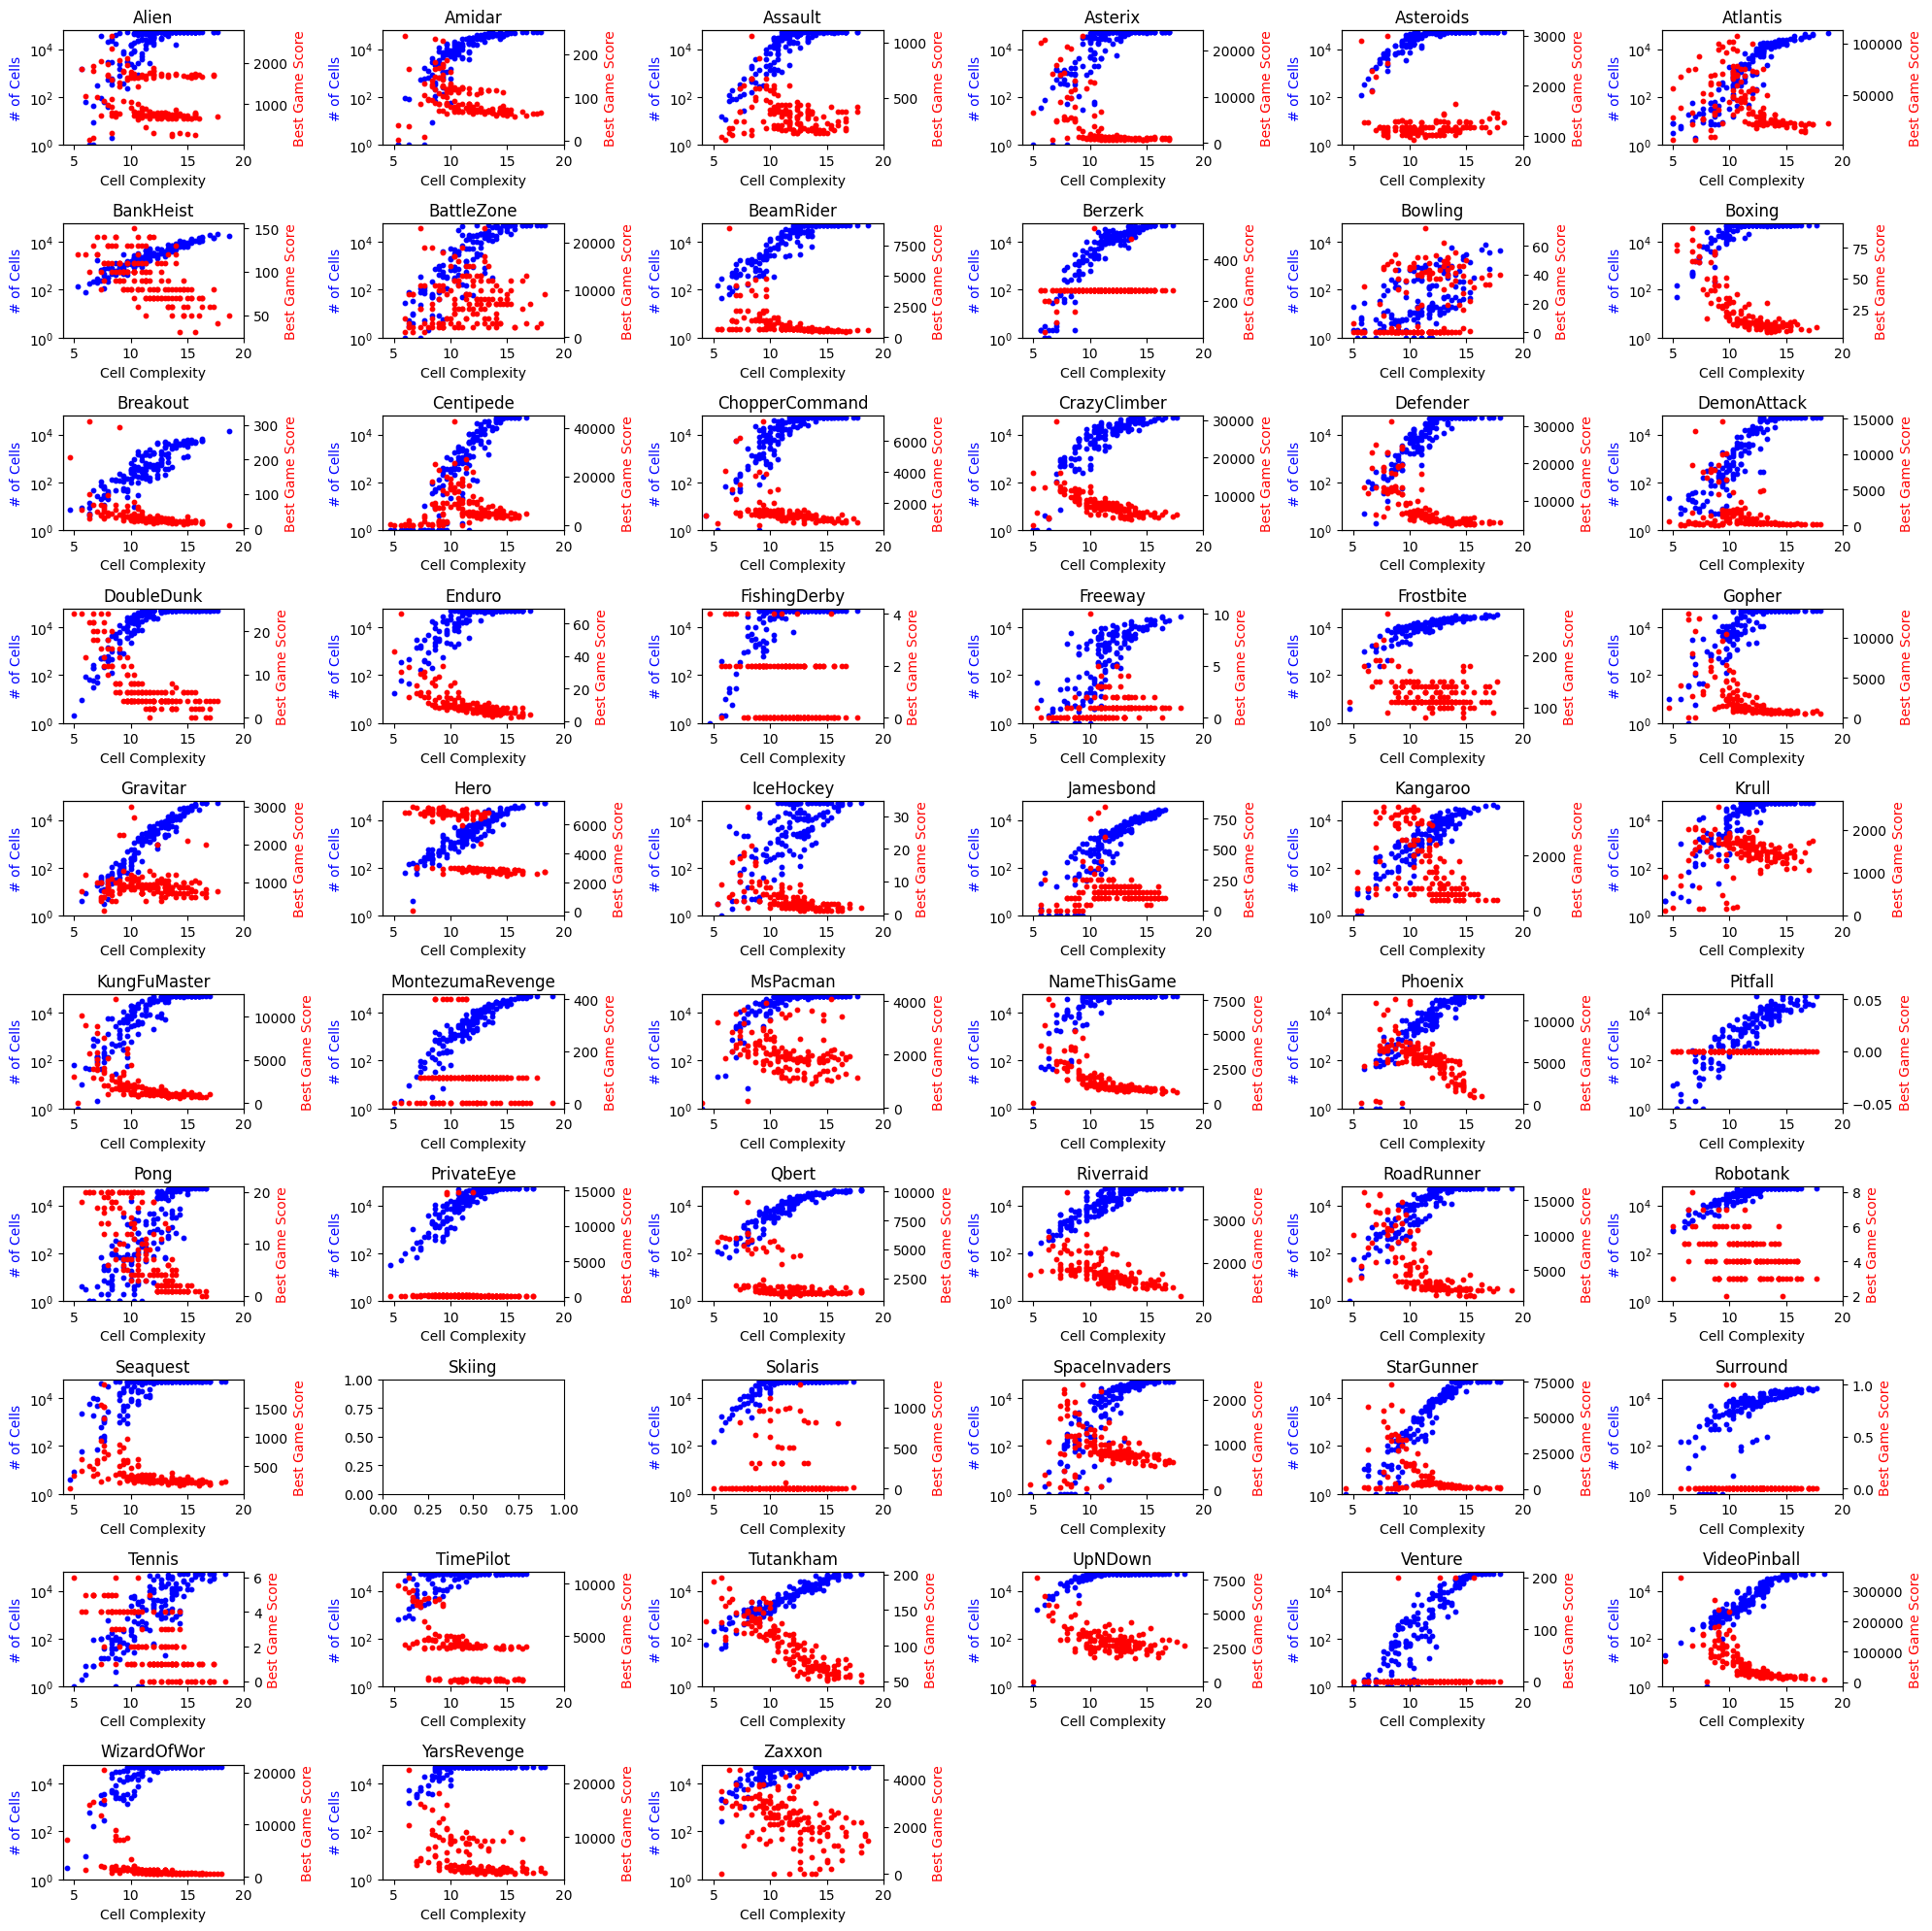

In [21]:
def plot_env_id(env_id, archives):
    n_cells, max_scores, complexity = [], [], []
    for archive in archives:
        n_cells.append(len(archive['traj']))
        max_scores.append(archive['ret'].max())
        complexity.append(archive['config']['h']+archive['config']['w']+archive['config']['d'])
    n_cells = np.array(n_cells)
    max_scores = np.array(max_scores)
    complexity = np.array(complexity)

    plt.scatter(complexity/3., n_cells, c='b', s=10.)
    # plt.axhline(y=15e3, c='b')
    plt.yscale('log')
    plt.ylabel('# of Cells', color='b')
    plt.xlabel('Cell Complexity')
    plt.ylim(1, 60000)
    plt.xlim(4, 20)
    
    plt.twinx()
    plt.scatter(complexity/3., max_scores, c='r', s=10.)
    plt.ylabel('Best Game Score', color='r')
    # plt.yscale('log')
    
viz_all_env(plot_env_id)
plt.show()

  0%|          | 0/57 [00:00<?, ?it/s]

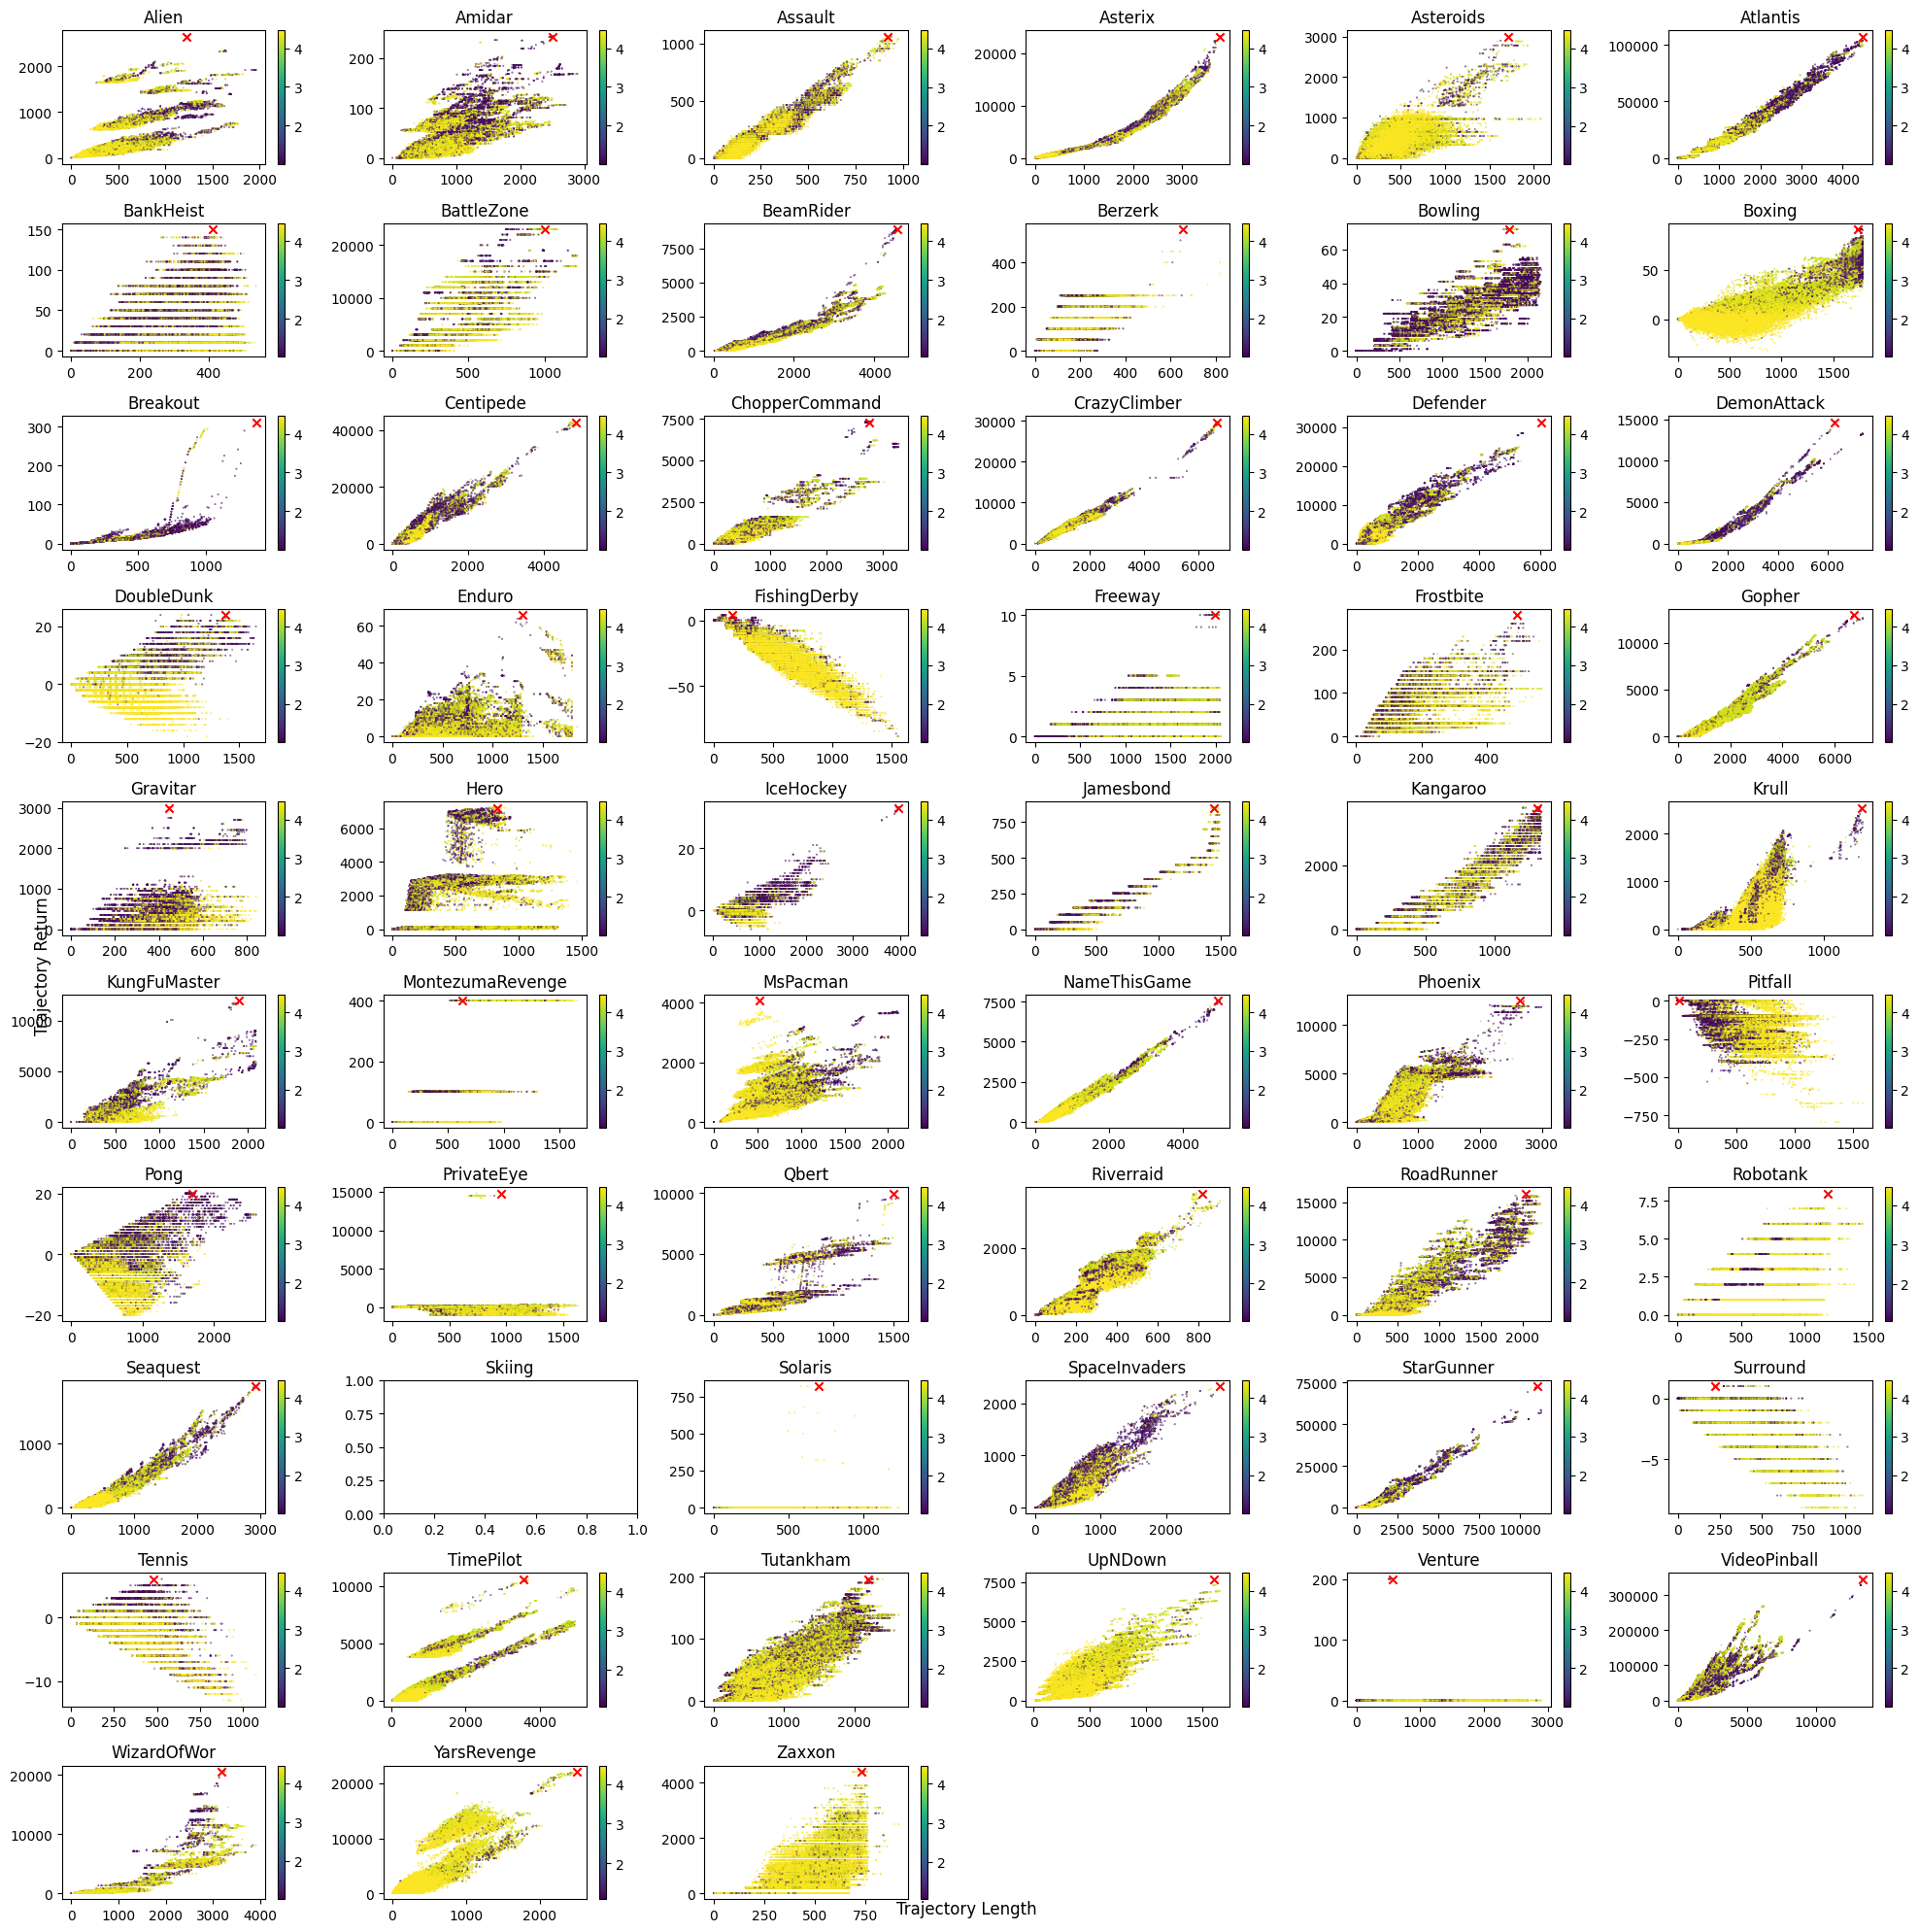

In [22]:
def plot_env_id(env_id, archives):
    tlens_all, rets_all, novs_all = [], [], []
    for archive in archives:
        trajs, rets, novs = archive['traj'], archive['ret'], archive['novelty']
        idx = np.random.permutation(len(trajs))[:100000//len(archives)]
        trajs, rets, novs = trajs[idx], rets[idx], novs[idx]
        tlens_all.extend([len(traj) for traj in trajs])
        rets_all.extend(rets)
        novs_all.extend(novs)

    plt.scatter(tlens_all, rets_all, s=.1, c=novs_all)
    plt.colorbar()
    plt.scatter(tlens_all[np.argmax(rets_all)], rets_all[np.argmax(rets_all)], marker='x', c='r')

viz_all_env(plot_env_id)
plt.gcf().supylabel('Trajectory Return')
plt.gcf().supxlabel('Trajectory Length')
plt.show()

  0%|          | 0/57 [00:00<?, ?it/s]

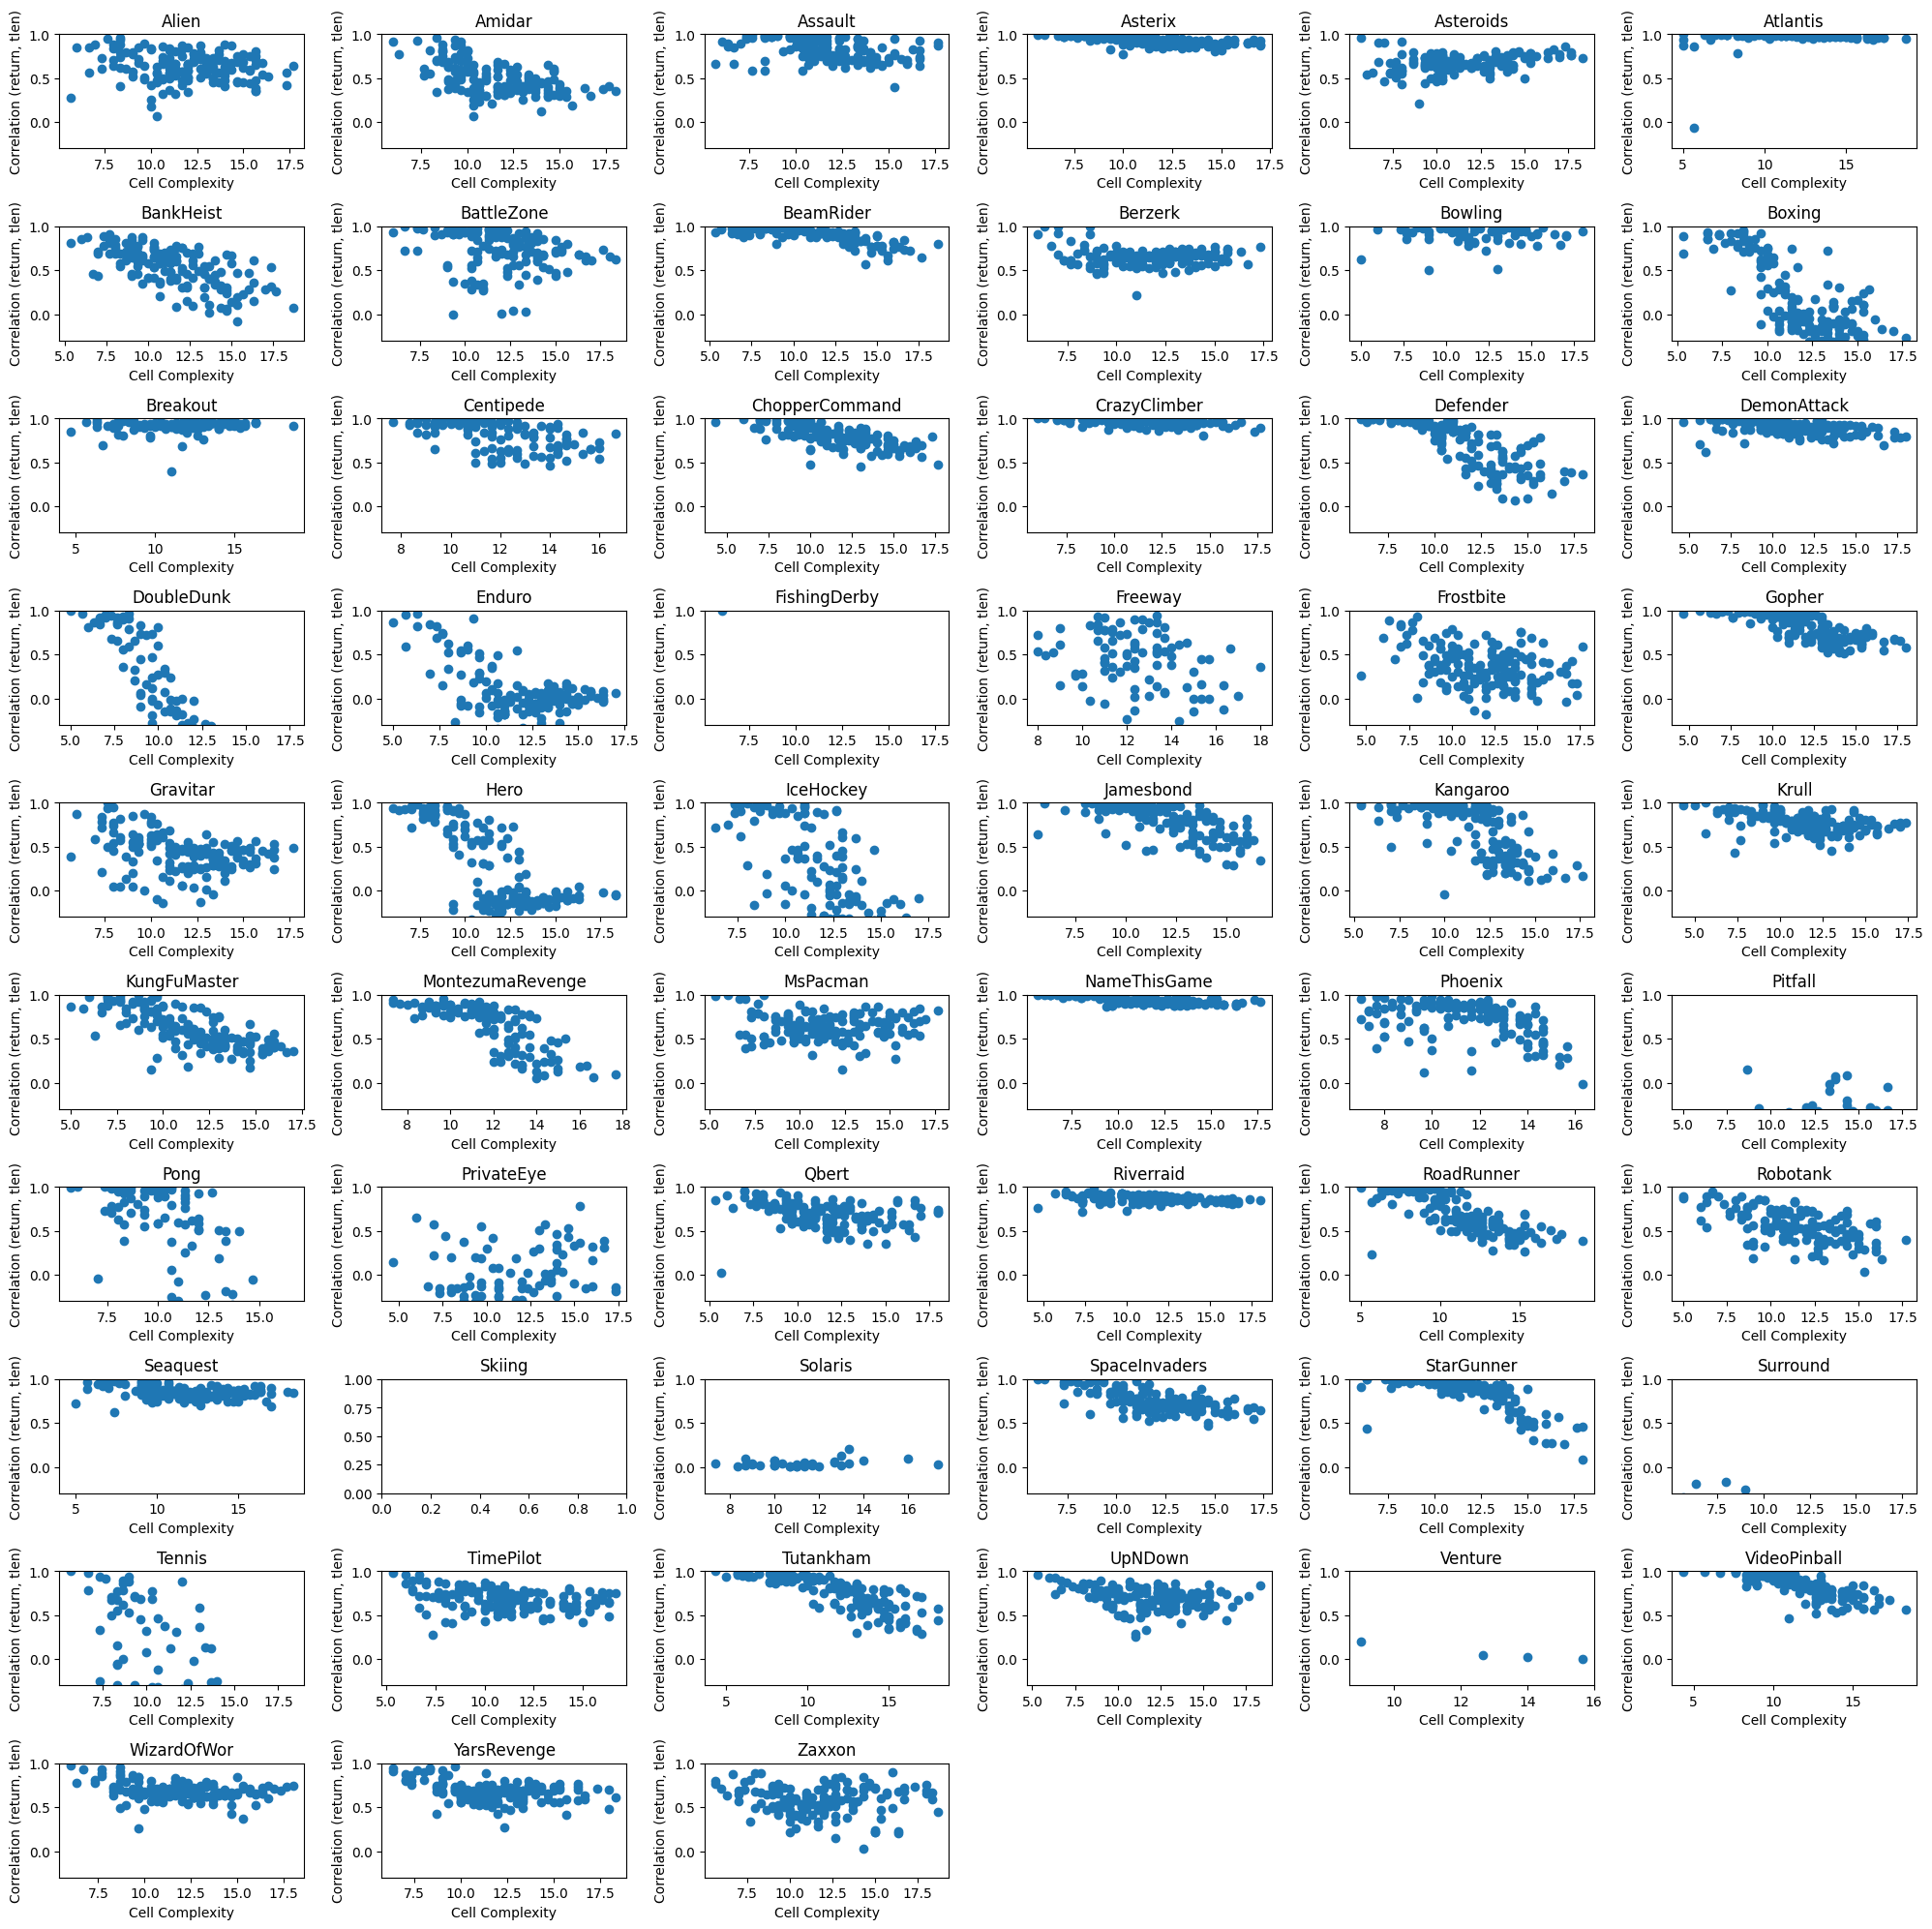

In [25]:
def plot_env_id(env_id, archives):
    complexity, corrs = [], []
    for archive in archives:
        trajs, rets, novs = archive['traj'], archive['ret'], archive['novelty']
        tlens = [len(traj) for traj in trajs]
        corr = np.corrcoef(x=tlens, y=rets)[0, 1]
        corrs.append(corr)
        complexity.append(archive['config']['h']+archive['config']['w']+archive['config']['d'])
    complexity, corrs = np.array(complexity), np.array(corrs)
    
    plt.scatter(complexity/3., corrs)
    plt.ylabel('Correlation (return, tlen)')
    plt.xlabel('Cell Complexity')
    plt.ylim(-0.3, 1)
    
viz_all_env(plot_env_id)
plt.show()

  0%|          | 0/57 [00:00<?, ?it/s]

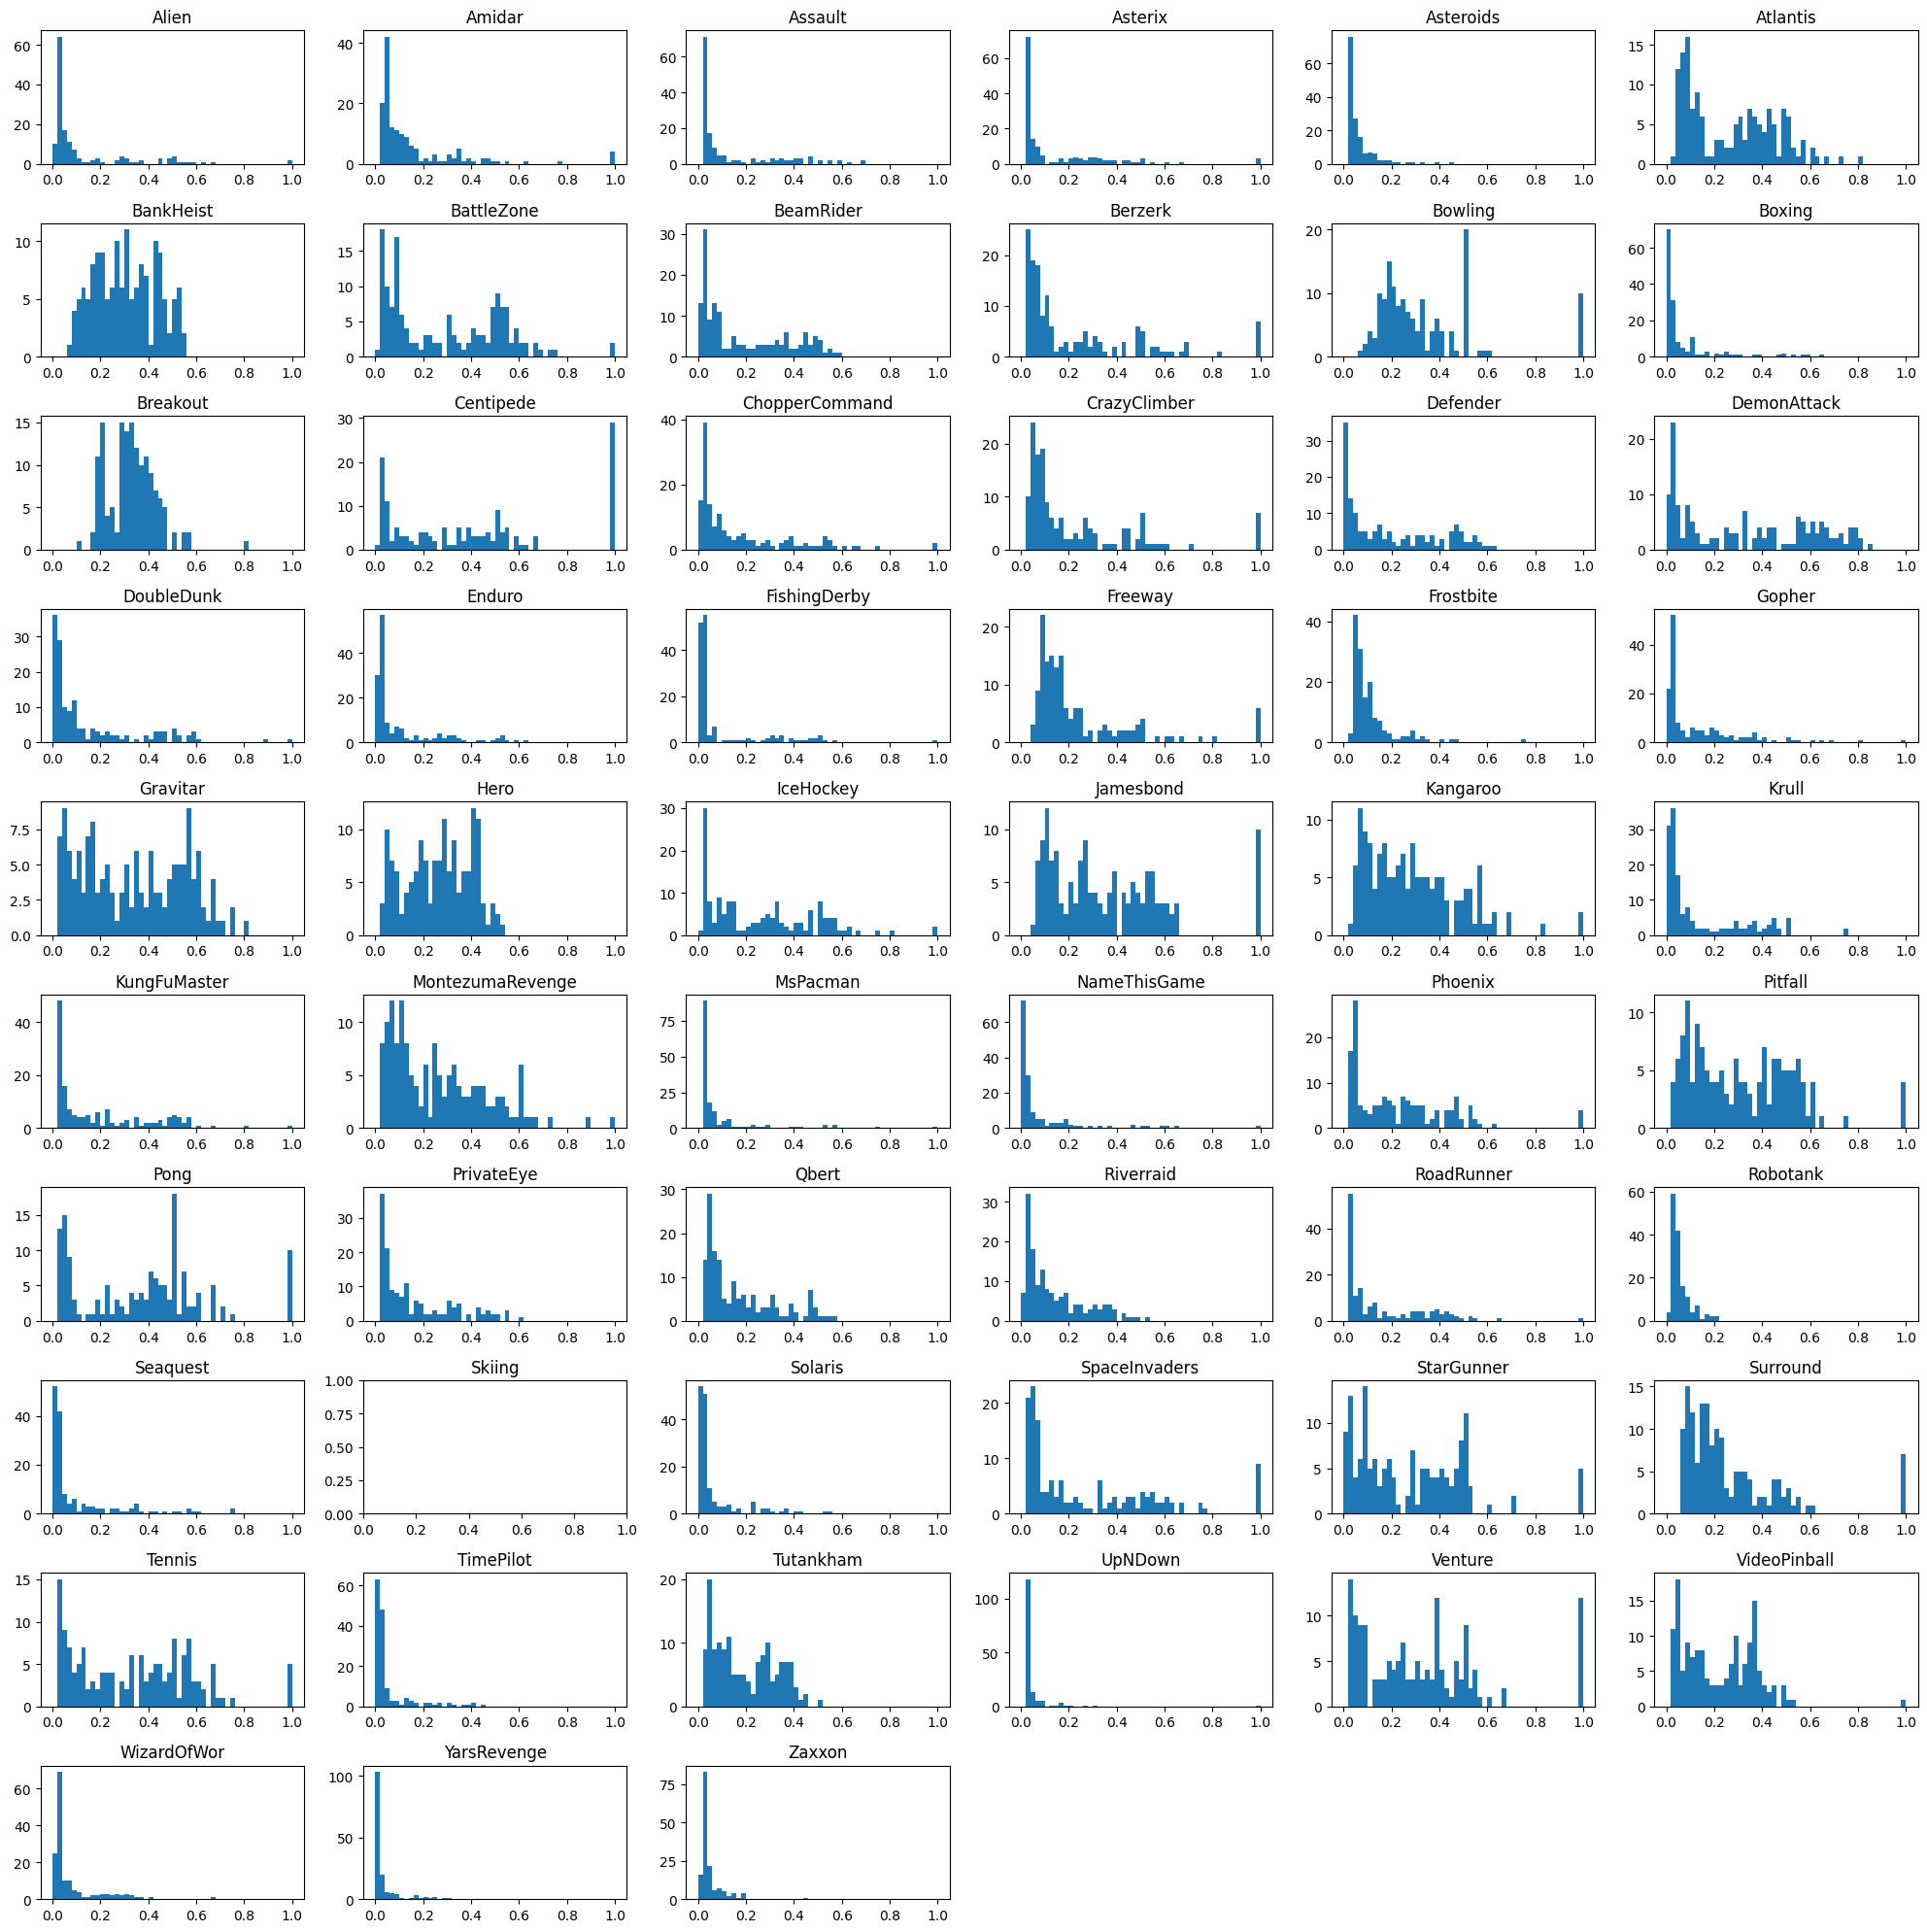

In [24]:
def plot_env_id(env_id, archives):
    percentages = []
    for archive in archives:
        is_leaf = archive['is_leaf']
        percentages.append(is_leaf.sum()/len(is_leaf))
    plt.hist(percentages, range=(0, 1), bins=50)
    # plt.x
    
viz_all_env(plot_env_id)
plt.show()